In [1]:
import ot
import time
import random
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold  import Isomap
from sklearn.neighbors import radius_neighbors_graph

from model.utils import normalize, fiedler, create_2D_class, fiedler_matching, pca_wass_2d
from model.pwfunction import procrustes_wasserstein, pw_barycenter

seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
I = plt.imread("data/dog.png").astype(np.float64)[::50, ::50, 2]
n = I.shape[0]
XX, YY = np.meshgrid(np.arange(n), np.arange(n))
x = normalize(np.stack((XX[I == 0], -YY[I == 0]), 1) * 1.0)
print('Number of point of the pivot cloud: ', x.shape[0])
d = x.shape[1]
pivot_color = fiedler(x)

num_samples = 50
dataset_n_r, dataset_r, dataset_colors = create_2D_class(x, pivot_color, num_samples=num_samples, noise=[.01,.01], 
                                                         rotate=True, seed=seed)

Number of point of the pivot cloud:  524


Compute the reference distances (ideally PW distance = W distance).

In [4]:
y_true_pw = []
y_true_w = []

for i in range(num_samples):
    cost_matrix = ot.dist(x, dataset_n_r[i])
    weights1 = np.ones(x.shape[0]) / x.shape[0]  # Uniform weights for pcd1
    weights2 = np.ones(dataset_n_r[i].shape[0]) / dataset_n_r[i].shape[0]  # Uniform weights for pcd2
    distance = ot.emd2(weights1, weights2, cost_matrix)
    y_true_w.append(distance)    
    P, Gamma, log = procrustes_wasserstein(x, dataset_n_r[i], weights1, weights2, log=True)
    y_true_pw.append(log['dist'])

# Esempio 2 (compariamo 'init' differenti per PW)

Gromov-Wasserstein con distanze euclidee

In [7]:
y_pred_GW_euclidean = []
registered_dataset_GW_euclidean = []
color_matching_GW_euclidean = []
success_list_euclidean = np.zeros(num_samples)

for i in range(num_samples):
    
    pc2 = dataset_r[i]
    
    weights1 = np.ones(x.shape[0]) / x.shape[0]
    weights2 = np.ones(pc2.shape[0]) / pc2.shape[0]
    C1 = sp.spatial.distance.cdist(x, x)
    C2 = sp.spatial.distance.cdist(pc2, pc2)
    gw0 = ot.gromov.gromov_wasserstein(C1, C2)
    U, E, Vh = np.linalg.svd(pc2.T @ gw0.T @ x)
    P_init = U @ Vh
    P, Gamma, log = procrustes_wasserstein(x, pc2, weights1, weights2,
                                           P_init=P_init, log=True)
    distance = log['dist']
    #print(distance)
    y_pred_GW_euclidean.append(distance)
    
    registered_dataset_GW_euclidean.append( pc2 @ P)
    color_matching_GW_euclidean.append( Gamma.T @ pivot_color )
    
    if np.abs(y_true_pw[i]-y_pred_GW_euclidean[i])<1e-7:
        print('Convergence')
        success_list_euclidean[i] = 1
    else:
        print('Not convergence !')
    
print('Matching with init GW (euclidean):', np.sum(success_list_euclidean))
success_rate_euclidean = np.sum(success_list_euclidean)

Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Not convergence !
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Convergence
Not convergence !
Convergence
Not convergence !
Not convergence !
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Matching with init GW (euclidean): 35.0


In [8]:
y_pred_GW_geodesic = []
registered_dataset_GW_geodesic = []
color_matching_GW_geodesic = []
success_list_geodesic = np.zeros(num_samples)
embedding = Isomap()

for i in range(num_samples):
    
    pc2 = dataset_r[i]
    
    weights1 = np.ones(x.shape[0]) / x.shape[0]
    weights2 = np.ones(pc2.shape[0]) / pc2.shape[0]
    dis1 = embedding.fit(x)
    C1 = dis1.dist_matrix_
    dis2 = embedding.fit(pc2)
    C2 = dis2.dist_matrix_
    gw0 = ot.gromov.gromov_wasserstein(C1, C2)
    U, E, Vh = np.linalg.svd(pc2.T @ gw0.T @ x)
    P_init = U @ Vh
    P, Gamma, log = procrustes_wasserstein(x, pc2, weights1, weights2,
                                           P_init=P_init, log=True)
    distance = log['dist']
    #print(distance)
    y_pred_GW_geodesic.append(distance)
    
    registered_dataset_GW_geodesic.append( pc2 @ P)
    color_matching_GW_geodesic.append( Gamma.T @ pivot_color )
    
    if np.abs(y_true_pw[i]-y_pred_GW_geodesic[i])<1e-7:
        print('Convergence')
        success_list_geodesic[i] = 1
    else:
        print('Not convergence !')
    
print('Matching with init GW (geodesic):', np.sum(success_list_geodesic))
success_rate_geodesic = np.sum(success_list_geodesic)

Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Not convergence !
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Matching with init GW (geodesic): 46.0


In [9]:
y_pred_fiedler = []
registered_dataset_fiedler = []
color_matching_fiedler = []
success_list_fiedler = np.zeros(num_samples)

for i in range(num_samples):
    
    pc2 = dataset_r[i]
    
    weights1 = np.ones(x.shape[0]) / x.shape[0]
    weights2 = np.ones(pc2.shape[0]) / pc2.shape[0]
    P_init = fiedler_matching(x, pc2)
    P, Gamma, log = procrustes_wasserstein(x, pc2, weights1, weights2,
                                           P_init=P_init, log=True)
    distance = log['dist']
    #print(distance)
    y_pred_fiedler.append(distance)
    
    registered_dataset_fiedler.append( pc2 @ P)
    color_matching_fiedler.append( Gamma.T @ pivot_color )
    
    if np.abs(y_true_pw[i]-y_pred_fiedler[i])<1e-7:
        print('Convergence')
        success_list_fiedler[i] = 1
    else:
        print('Not convergence !')
    
print('Matching with init Wass-Fiedler :', np.sum(success_list_fiedler))
success_rate_fiedler = np.sum(success_list_fiedler)

Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Convergence
Matching with init Wass-Fiedler : 50.0


In [10]:
y_pred_PCA_wass = []
registered_dataset_PCA_wass = []
color_matching_PCA_wass = []
success_list_PCA_wass = np.zeros(num_samples)

for i in range(num_samples):
    
    pc2 = dataset_r[i]
    
    weights1 = np.ones(x.shape[0]) / x.shape[0]
    weights2 = np.ones(pc2.shape[0]) / pc2.shape[0]
    P_init = pca_wass_2d(pc2, x)
    P, Gamma, log = procrustes_wasserstein(x, pc2, weights1, weights2,
                                           P_init=P_init, log=True)
    distance = log['dist']
    #print(distance)
    y_pred_PCA_wass.append(distance)
    
    registered_dataset_PCA_wass.append( pc2 @ P)
    color_matching_PCA_wass.append( Gamma.T @ pivot_color )
    
    if np.abs(y_true_pw[i]-y_pred_PCA_wass[i])<1e-7:
        print('Convergence')
        success_list_PCA_wass[i] = 1
    else:
        print('Not convergence !')
    
print('Matching with init PCA-Wass :', np.sum(success_list_PCA_wass))
success_rate_PCA_wass = np.sum(success_list_PCA_wass)

Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Not convergence !
Not convergence !
Convergence
Convergence
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Convergence
Not convergence !
Convergence
Convergence
Not convergence !
Not convergence !
Convergence
Not convergence !
Not convergence !
Not convergence !
Not convergence !
Not convergence !
Not convergence !
Convergence
Not convergence !
Convergence
Convergence
Convergence
Not convergence !
Convergence
Matching with init PCA-Wass : 31.0


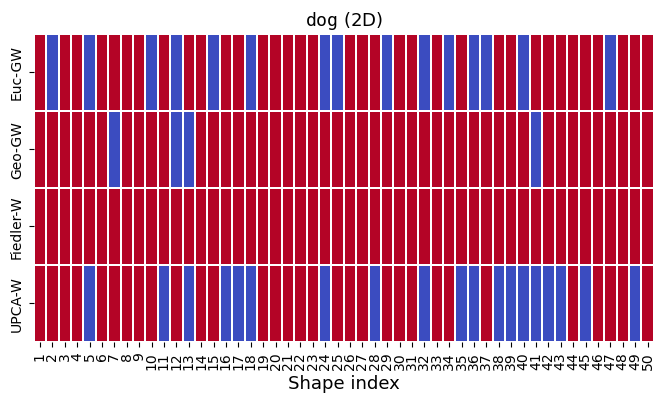

In [11]:
plt.figure(figsize=(8,4))
data = np.array([success_list_euclidean, success_list_geodesic, success_list_fiedler, success_list_PCA_wass])
sns.heatmap(data, annot=False, cmap='coolwarm', xticklabels=range(1, num_samples+1), 
            yticklabels=['Euc-GW', 'Geo-GW', 'Fiedler-W', 'UPCA-W'], linewidth=.05, cbar=False)
plt.xlabel('Shape index', fontsize=13)
plt.title(r'$\mathtt{dog}$ (2D)', fontsize=13)
plt.savefig('fig/PW_init_2D.pdf', bbox_inches='tight', format="pdf")
plt.show()

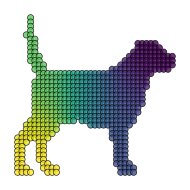

In [12]:
fig, ax = plt.subplots(1,1, figsize=(2,2))
ax.scatter(x[:, 0], x[:, 1], c=pivot_color, edgecolors="k", alpha=.8, s=20, cmap='viridis', linewidth=.5)
ax.set_axis_off()
#ax.set_xticks([])
#ax.set_yticks([])
plt.tight_layout()
plt.savefig('fig/Supplementary/2D_pivot.pdf', bbox_inches='tight', format="pdf")
plt.show()

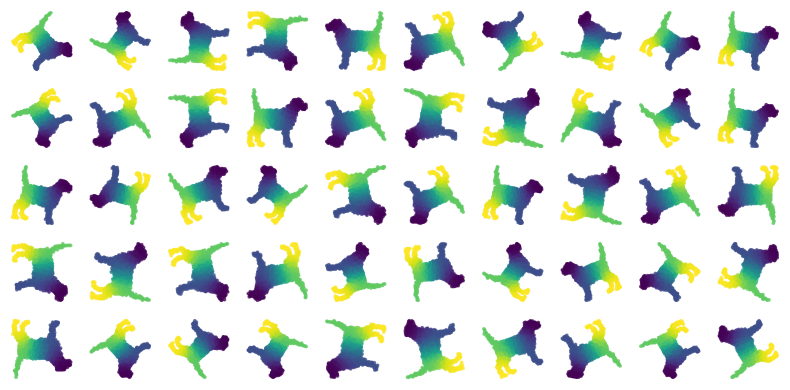

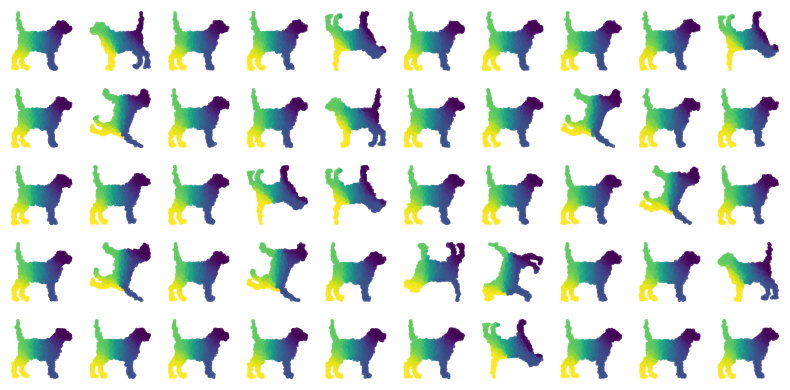

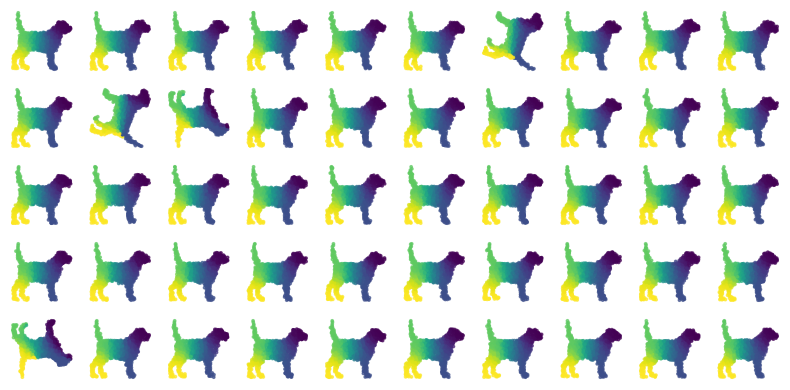

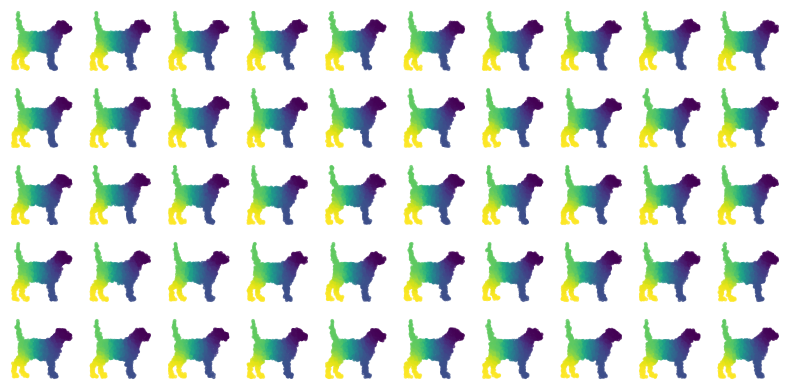

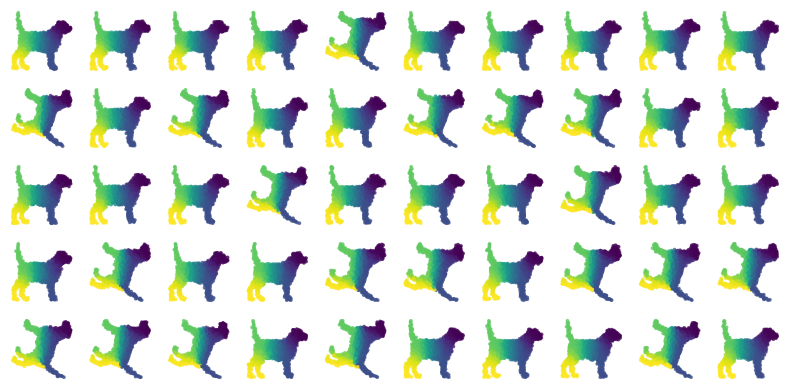

In [29]:
datasets = [dataset_r, registered_dataset_GW_euclidean, registered_dataset_GW_geodesic,
            registered_dataset_fiedler, registered_dataset_PCA_wass]
colors = [dataset_colors, color_matching_GW_euclidean, color_matching_GW_geodesic,
          color_matching_fiedler, color_matching_PCA_wass]

names = ['2D_Dataset',
         '2D_EucGW_matching',
         '2D_GeoGW_matching',
         '2D_Fiedler_matching',
         '2D_UPCAW_matching']

for j, dataset in enumerate(datasets):
    color = colors[j]
    fig = plt.figure(figsize=(8, 4))
    for i in range(num_samples):
        sample = dataset[i]
        ax = fig.add_subplot(5, 10, i+1)
        ax.scatter(sample[:, 0], sample[:, 1], 
                   c=color[i], 
                   # edgecolors="k", 
                   alpha=.7, 
                   s=3, 
                   cmap='viridis')
        #ax.set_xticks([])
        #ax.set_yticks([])
        ax.set_axis_off()
    
    #plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.tight_layout()
    #plt.savefig(f'fig/Supplementary/{names[j]}.pdf', bbox_inches='tight', format="pdf")
    plt.savefig(f'fig/Supplementary/{names[j]}.png', dpi=200)
    plt.show()